<a href="https://colab.research.google.com/github/bilalbenmessahel/deep-learning/blob/main/Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: Predicting y values from x using the equation y=w⋅x+b   where w (weight) and b (bias) are parameters that we want to learn.

1.	Import **Libraries**  

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


2.	Create Sample Data
Let’s create some synthetic data that follows a linear pattern with some noise.


In [2]:
# Generate synthetic data: y = 2 * x + 1 + noise
torch.manual_seed(0)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # Inputs (100 points)
Y = 2 * X + 1 + torch.randn(100, 1) * 2  # Outputs with some added noise


# Plot the generated data

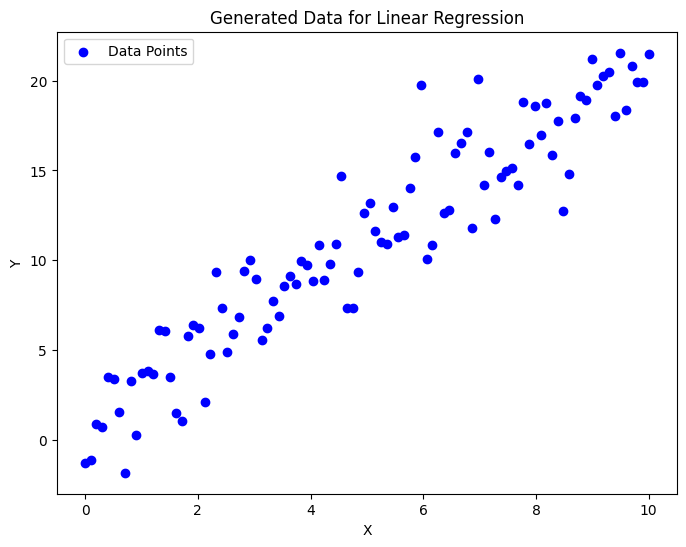

In [3]:
# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data for Linear Regression')
plt.legend()
plt.show()

3.	Define the Model
In PyTorch, we define a linear regression model as a single layer with no activation.

In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()


4.	Set the Loss Function and Optimizer
•	Loss Function: Mean Squared Error (MSE) is commonly used for regression.
•	Optimizer: Stochastic Gradient Descent (SGD) or Adam are popular choices.


In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


5.	 Training Loop
Train the model by adjusting the parameters (w and b) to minimize the loss.


In [6]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: Compute prediction and loss
    predictions = model(X)
    loss = criterion(predictions, Y)

    # Backward pass: Compute gradients and update parameters
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 4.2415
Epoch [200/1000], Loss: 4.2140
Epoch [300/1000], Loss: 4.2039
Epoch [400/1000], Loss: 4.2001
Epoch [500/1000], Loss: 4.1987
Epoch [600/1000], Loss: 4.1982
Epoch [700/1000], Loss: 4.1980
Epoch [800/1000], Loss: 4.1979
Epoch [900/1000], Loss: 4.1979
Epoch [1000/1000], Loss: 4.1979


6.	Evaluate the Model
After training, we can visualize the fitted line against the data.


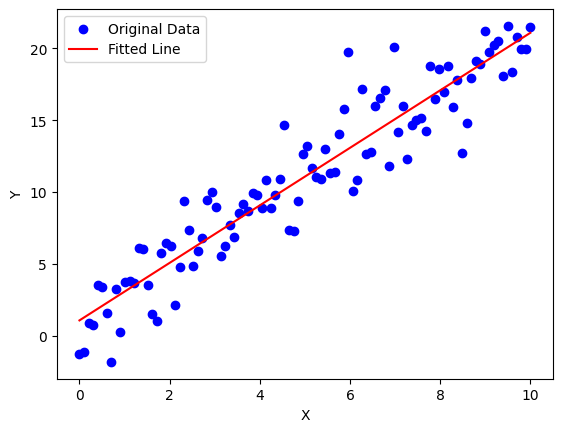

In [7]:
# Plot the data and the model's predictions
with torch.no_grad():
    predicted = model(X).detach()  # Get predictions

plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original Data')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Fitted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


7.	Save the Model (Optional)

In [9]:
torch.save(model.state_dict(), 'linear_regression_model.pth')